### Непараметрические критерии

#### Одновыборочный Критерий знаков

Критерий знаков - это непараметрический аналог одновыборочного t-критерия, и он используется для проверки, равняется ли медиана выборки заданному значению. 

**Задача**

Даны наблюдения времени выполнения контрольной работы по математике в школе. Проверить гипотезу о том, что время выполнения контрольной работы - 35 минут.

In [1]:
sample = [29, 41, 39, 62, 46, 31, 29, 28, 30, 31, 45, 41]

**Решение задачи**

1. Установим уровень значимости α = 5%.
2. Будем использовать одновыборочный критерий знаков.

Нулевое распределение будет выглядеть следюущим образом (просто полный перебор вариантов при n = len(samples)):

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import itertools
import scipy
import tqdm
from scipy import stats
import random

from IPython.display import *

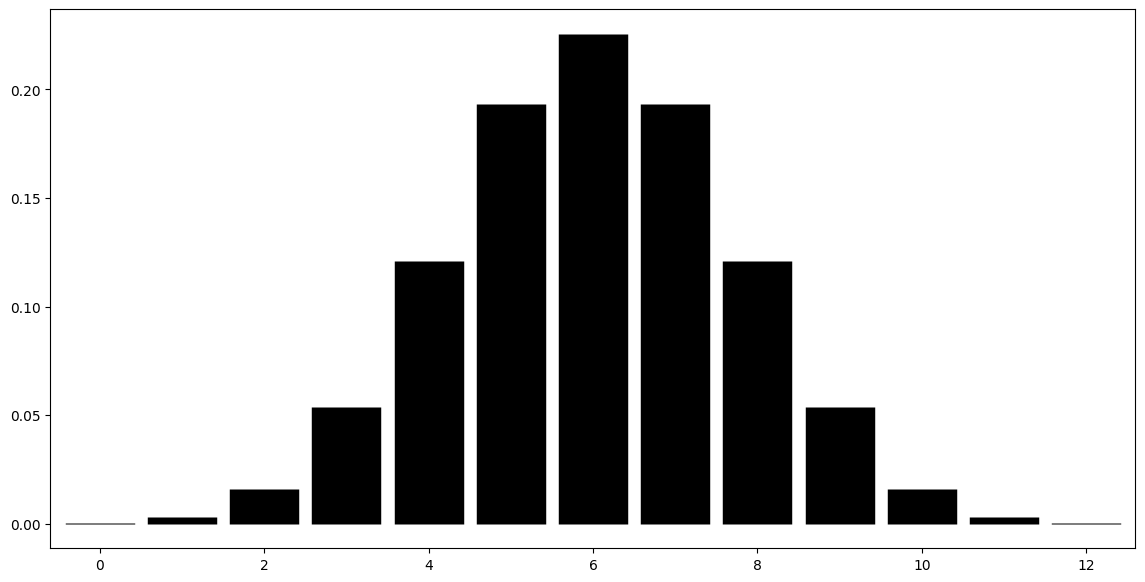

In [3]:

plt.figure(figsize = (14,7))

pb = stats.binom(n = len(sample), p = 0.5)
x = np.arange(0,13)
pmf = pb.pmf(x)

plt.vlines(x ,0, pb.pmf(x), colors='k', linestyles='-', lw=50)
plt.show()

In [4]:
pb.cdf(sum(np.array(sample) > 35)) > 0.05

True

Вывод: гипотеза о равенстве продолжительности урока 35 минутам не отвергается.

In [5]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue = sign_test(sample, mu0=35)
pvalue

1.0

#### Двувыборочный критерий знаков для связанных выборок

**Задача**

Курьеры передвигались на самокатах, затем им выдали велосипеды и записали среднее время, с которым они доставляли заказы до и после выдачи велосипедов. Проверить гипотезу о том, что на велосипедах курьеры передвигаются быстрее.

In [6]:
norm_rv1 = stats.norm(loc=35, scale = 5)

df = pd.DataFrame()
df['time_before'] = norm_rv1.rvs(size=20)
df['time_after'] = norm_rv1.rvs(size=20)
df.head()

,time_before,time_after
0,29.414597,26.611618
1,26.498089,37.360027
2,37.585168,37.679956
3,42.811159,40.085997
4,36.621921,31.292931


**Решение задачи**

1. Установим уровень значимости критерия α = 5%.
2. Будем использовать двувыборочный критерий знаков для связанных выборок и проверять одностороннюю гипотезу.

In [7]:
df['stat_M'] = np.where(df.time_before > df.time_after,1,0)
df.head(2)

,time_before,time_after,stat_M
0,29.414597,26.611618,1
1,26.498089,37.360027,0


In [8]:
pb = stats.binom(n = df.shape[0], p = 0.5)
pb.cdf(df['stat_M'].sum())

0.7482776641845703

Вывод: нулевая гипотеза не отвергается.

In [9]:
from statsmodels.stats.descriptivestats import sign_test
_, pvalue = sign_test(df['time_before'] - df['time_after'])
pvalue

0.8238029479980469

#### Ранговые критерии

**Одновыборочный ранговый критерий Уилкоксона**

Наблюдаем: $X_1, X_2, …, X_n;$

Предполагаем: $X_i$  независимы;

Проверяемая гипотеза: $H_{0} : Med(X) = m_0 , H_{1} : Med(X) <> m_0 $ 

**Статистика:** $ \\ W = \sum_{i=1}^N rank(|X_i −m_0|)·sign(X_i −m_0)  $ ~ распределение табличное либо нормальное при большом числе наблюдений


**Задача**

Даны наблюдения времени выполнения контрольной работы по математике в школе. Проверить гипотезу о том, что время выполнения контрольной работы - 35 минут.

**Решение задачи**

1. Установим уровень значимости критерия α = 5%.
2. Будем использовать одновыборочный критерий знаковых рангов Уилкоксона.

In [10]:
stats.wilcoxon(np.array(sample) - 35)

WilcoxonResult(statistic=30.0, pvalue=0.5185546875)

Вывод: гипотеза о равенстве продолжительности урока 35 минутам не отвергается.

**Двувыборочный ранговый критерий Уилкоксона для связанных выборок**

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i$ и $Y_i$ зависимы;

Проверяемая гипотеза: $H_{0} : Med(X-Y) = 0 , H_{1} :  Med(X-Y) <> 0 $ 

**Статистика:** $  W = \sum_{i=1}^N rank(|X_{i} − Y_{i}|)·sign(X_{i} − Y_{i}) $ 

Аналогично одновыборочному критерию.

По данным задачи об изменении транспортного средства курьеров:

In [11]:
stats.wilcoxon(df['time_before'] , df['time_after'])

WilcoxonResult(statistic=89.0, pvalue=0.5705966949462891)

**Двувыборочный критерий Манна-Уитни для несвязанных выборок**

Наблюдаем: $X_1, X_2, …, X_{n_{x}}, Y_1, Y_2, …, Y_{n_{y}};$

Предполагаем: $X_i$ и $Y_i$ независимы;

Проверяемая гипотеза:
$\\ H_0: f_{X} (x) =  f_{Y} (y), $
 $H_1: f_{X} (x) =  f_{Y} (y + ∆),∆ <> 0 $

**Статистика:** $ \\ U = n_1n_2 + \frac{n_x(n_x+1)}{2} - T_x $ где определяем большую из двух ранговых сумм как $T_x$ соответствующую выборке с $n_x$ элементами.

Как считается коэффициент:
- в составленном едином ранжированном ряду общее количество рангов получится равным: n1 + n2.
- подсчитываем отдельно сумму рангов, пришедшихся на долю элементов первой выборки, и отдельно - на долю элементов второй выборки.
- далее рассчитываем сам коэффициент U.

In [12]:
a = [29, 41, 39, 62, 46, 31, 29, 28, 30, 31, 45, 41]
b = [20, 37, 31, 69, 1, 0, -1, 28, 30, 31, 40, 15]

In [13]:
sample_vel = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 38.8, 43.6, 34.4]
sample_sam = [34.2, 35.4, 53.2, 37.8, 34.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
       52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
       35.4, 32.3, 31.4, 37.6, 33.3, 42.9, 48.9, 39.2]

In [14]:
stats.mannwhitneyu(sample_vel, sample_sam)

MannwhitneyuResult(statistic=307.5, pvalue=0.03576983135135158)

### Множественные сравнения

**Задача**

Проверить гипотезу о том, что на личном транспорте добираться до университета быстрее, чем на общественном.

In [15]:
samokat = [34.2, 35.4, 53.2, 37.8, 31.6, 31.4, 35.8, 40.4, 32.4, 29.8, 30.9,
       52.5, 44. , 32.3, 39.3, 31.7, 48.3, 34.7, 41.1, 52.3, 38.8, 55.8,
       35.4, 32.3, 31.4, 31.6, 33.3, 32.9, 48.9, 39.2]

bike = [32.8, 44.3, 29. , 23.5, 26.7, 39. , 36.2, 25.6, 37.9, 36.5, 43.8,
       59.7, 37.7, 38.4, 32.1, 28.2, 34.4, 22.1, 12.6, 26.9, 29.9, 55.5,
       34.1, 22.4, 25.4, 40. , 22.5, 18.8, 13.6, 34.4]

motorbike = [27.8, 38.1, 31.3, 36.6, 33.6, 43.3, 31.1, 31.1, 38.7, 44.9, 43.4,
       39.4, 47.9, 32.3, 28.4, 39.9, 38.5, 30.6, 29. , 36.6]

public_transport = [36.5, 42.1, 38. , 34.6, 38.5, 36.7, 29.6, 39.4, 32.4, 41.3, 30.1,
       29.5, 33.8, 40.6, 31.3, 31.1, 38.3, 38.6, 28.3, 33.8]

**Решение задачи**

1. Установим уровень значимости критерия α = 5%.
2. Нулевая гипотеза - время передвижения на публичном транспорте равно времени передвижения на личном, алтернативная - скорости не равны.
3. Будем использовать двувыборочный критерий Манна-Уитни, попарно сравнивая выборки.

In [16]:
pvals = []
for s in [samokat, bike, motorbike]:
    U, p = stats.mannwhitneyu(public_transport, s, alternative='greater')
    pvals.append(p)

In [17]:
pvals

[0.8575808095163361, 0.048099425470081544, 0.6375057571656346]

Простое попарное сравнение показало, что можем отвергнуть гипотезу об одинаковой скорости передвижения на велосипеде и публичном транспорте, исопльзуем поправку Бонферрони.

In [18]:
from statsmodels.sandbox.stats.multicomp import multipletests
hyp_rej, corrected_pvals , _ , _ = multipletests(pvals, alpha=0.05, method='bonferroni')

In [19]:
hyp_rej

array([False, False, False])

Вывод: с учетом поправки Бонферрони не можем отклонить ни одну гипотезу о том, что время передвижения на личном транспорте меньше времени передвижения на публичном в пользу альтернативной.